# EE 538: Low-Noise Analog Circuit Design
## Spring 2021
## Instructor: Jason Silver

## Announcements

 - Assignment 1 due Sunday, April 11 at midnight
    - Jupyter Notebook (.ipynb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)
 - Assignment 2 will be posted Saturday, April 17

## Week 2

 - Motchenbacher Chapters 2 and 3
 - Art of Electronics Chapter 8

## Overview

 - Last time...
     - Random variables
     - Thermal noise
     - Noise bandwidth
     - Shot noise 
     - Flicker noise
 - Today
     - 2-port noise theory
     - Noise figure/noise factor
     - Amplifier noise model
     - Correlated noise sources
     - Feedback amplifier noise analysis

## Python packages/modules

In [139]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy import integrate
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_log3xy(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.semilogx(x, y3, 'g', label=y3label)  
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_NF_vs_Rs(en_vals, in_vals, Rs_min, Rs_max, T_in_K):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    F1 = 1 + (en_vals[0]**2+Rs**2*in_vals[0]**2)/(4*k*T_in_K*Rs)
    F2 = 1 + (en_vals[1]**2+Rs**2*in_vals[1]**2)/(4*k*T_in_K*Rs)
    F3 = 1 + (en_vals[2]**2+Rs**2*in_vals[2]**2)/(4*k*T_in_K*Rs)
    ax.semilogx(Rs, 10*np.log10(F1), 'b', label=r'$e_{n1}$, $i_{n1}$')
    ax.semilogx(Rs, 10*np.log10(F2), 'r', label=r'$e_{n2}$, $i_{n2}$')
    ax.semilogx(Rs, 10*np.log10(F3), 'g', label=r'$e_{n3}$, $i_{n3}$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Noise Figure $NF$ [$dB$]')  
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_noise_curve(e_n, i_n, Rs_min, Rs_max):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    e_ni_2 = 4*k*T*Rs + e_n**2 + i_n**2*Rs**2
    ax.loglog(Rs, np.sqrt(e_ni_2), 'b', label='Total Noise')
    ax.loglog(Rs, np.sqrt(4*k*T*Rs), 'r', label=r'$\sqrt{4kTR_s}$')
    ax.loglog(Rs, e_n*np.ones(np.size(Rs)), 'g', label=r'$e_n$')
    ax.loglog(Rs, i_n*Rs, 'y', label=r'$i_n R_s$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Equivalent Input Noise [$V/\sqrt{Hz}$]')
    
    ax.legend()
    ax.legend(loc='upper center', ncol=4, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )   


In [107]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 2 - Noise in Amplifiers

## Two-port noise model

<center><img src="img/2port_noise_model.png" width=800 /></center>

 - In the model, all noise appears as inputs to a noiseless network, but arises from the thermal, flicker, and shot noise of the transistors and resistors that make up the amplifier/system
 
 - This noise model allows us to focus on system-level considerations rather than needing to keep track of all the internal noise sources
 
 - The net effect of all internal noise sources can be represented by a single pair of extrenal sources: a noise voltage $\overline{e_n}$ and a noise current $\overline{i_n}$
 
 - Note that both $\overline{e_n}$ and $\overline{i_n}$ are required to represent the noise characteristics of a system/amplifier

 - Assuming the noise processes of the source and two-port system are uncorrelated (which would be the typical case), the short-circuit mean-square noise current is given by
 
\begin{equation}
\overline{i_{ni}^2} = \overline{i_{ns}^2} + \overline{|i_n + Y_s e_n|^2}
\end{equation}

 - Note that this expression does not assume that $i_n$ and $e_n$ are uncorrelated. In general, $i_n$ contains components that are correlated ($i_c$) and uncorrelated ($i_u$) with $e_n$, such that
 
\begin{equation}
i_n = i_c + i_u
\end{equation}

 - $i_c$ can be related to $e_n$ through a *correlation admittance* $Y_c$, such that $i_c = Y_c e_n$
 
 - Expanding the above expression gives
 
\begin{equation}
\overline{i_{ni}^2} = \overline{i_{ns}^2} + \overline{i_{u}^2} + |Y_s + Y_c|^2\overline{e_n^2}
\end{equation}

## Correlation between noise sources

 - Two noise sources are partially correlated when each contains noise that arises from a common phenomenon, in addition to independently generated noise
 
 - As an example, to combine partially correlated voltage noise sources, we can use the general expression
 
\begin{equation}
e_n^2 = (e_{n1}+e_{n2})^2 =  e_{n1}^2 + e_{n2}^2 + 2C_c e_{n1} e_{n2}
\end{equation}

 - where $C_c$ is the correlation coefficient
 
 - For completely independent noise sources, $C_c = 0$ and we combine the mean-square quantities directly:
 
\begin{equation}
e_n^2 = e_{n1}^2 + e_{n2}^2
\end{equation}

## Noise factor

 - For optimum noise performance, we want to minimize the degradation in the signal-to-noise ratio ($\text{SNR}$) that a system introduces
 
 - The noise factor is defined as
 
\begin{equation}
F \equiv \dfrac{\text{total output noise power}}{\text{output noise due to input source}}
\end{equation}

 - $F$ can also be expressed as the ratio of input $\text{SNR}$ to output $\text{SNR}$. The larger the degradation in $\text{SNR}$, the larger the noise factor
 
 - If a system adds no noise of its own (the ideal case), then the total output noise is due entirely to the source and the noise factor is unity 
 
 - Noise factor is a handy figure of merit to compare amplifiers (or transistors) for a signal source with a given impedance

## Two-port noise factor

 - With the input-referred noise current is given by
 
\begin{equation}
\overline{i_{ni}^2} = \overline{i_{ns}^2} + \overline{i_{u}^2} + |Y_s + Y_c|^2\overline{e_n^2}
\end{equation}
 
 - We can define each noise source as an equivalent resistance/conductance (even if the noise isn't actually due a resistance/conductance):
 
\begin{equation}
R_n \equiv \dfrac{\overline{e_n^2}}{4kT\Delta f} \;\;\;\; G_u \equiv \dfrac{\overline{i_u^2}}{4kT\Delta f} \;\;\;\; G_s \equiv \dfrac{\overline{i_s^2}}{4kT\Delta f}
\end{equation}

 - From these definitions we can express the noise factor purely in terms of impedances and admittances
 
\begin{equation}
F = 1 + \dfrac{G_u + |Y_c+Y_s|^2R_n}{G_s} = 1 + \dfrac{G_u + [(G_c+G_s)^2+(B_c+B_s)^2]R_n}{G_s}
\end{equation}

 - where each admittance has been decomposed into a sum of conductance $G$ and susceptance $B$
 
 - Going forward we'll drop the overbars for convenience, but we need to remember that we're still dealing with random voltage and current noise sources expressed in terms of $rms$ and mean-square values

 - For the common (low-frequency) case where $Y_c = 0$, and assuming $Z_s = Y_s^{-1} \approx R_s$, the input-referred mean-square voltage noise density can be expressed as

\begin{equation}
e_{ni}^2 = e_{ns}^2 + e_n^2 + R_s^2 i_n^2
\end{equation}

 - The two-port noise factor is thus
 
\begin{equation}
F = \dfrac{e_{ns}^2 + e_n^2 + R_s^2 i_n^2}{e_{ns}^2} = 1 + \dfrac{e_n^2 + R_s^2 i_n^2}{e_{ns}^2} = 1+N_e
\end{equation}

 - $N_e$ is an excess noise power ratio, equal to $F-1$, that expresses the *excess* noise contributed by the amplifier 

 - The *noise figure* $\text{NF}$ is the noise factor in decibels:
 
\begin{equation}
\text{NF} = 10\log{F} = 10\log \left[ 1 + \dfrac{e_n^2 + R_s^2 i_n^2}{e_{ns}^2} \right]
\end{equation}

## Noise resistance

 - The noise resistance of an amplifier is the (possibly fictitious) value of resistance that would generate thermal noise equal to that of the amplifier:
 
\begin{equation}
e_n^2 + i_n^2R_s^2 = 4kTR_e \Delta f
\end{equation}

\begin{equation}
R_e = \dfrac{e_n^2+i_n^2R_s^2}{4kT \Delta f}
\end{equation}

 - Using the concept of noise resistance, the noise factor can be expressed as
 
\begin{equation}
F = \dfrac{R_s + R_e}{R_s} = 1 + N_e
\end{equation}

 - The utility of $R_e$ is in comparing amplifier noise to that of resistors used in, for example, amplifier feedback networks
 
 - As a reference, neglecting $i_n$, a relatively low $e_n$ of $1nV/\sqrt{Hz}$ equates to an $R_e$ of approximately $60\Omega$
 

## Noise temperature

- Noise temperature is an alternative way of expressing the effect of an amplifier's noise contribution, and is defined as the increase in temperature required for the source resistance to generate the entirety of the amplifier output noise 
 
\begin{equation}
4kT_n R_s \Delta f = e_n^2 + i_n^2 R_s^2
\end{equation}

 - This yields
 
\begin{equation}
T_n = \dfrac{e_n^2 + i_n^2R_s^2}{4kT_{ref}R_s \Delta f}
\end{equation}

\begin{equation}
F = 1 + \dfrac{T_n}{T_{ref}}
\end{equation}

 - $T_{ref}$ is the reference/ambient temperature, typically taken to be $290K$
 
 - Good low-noise designs have noise temperatures far below room temperature (or, equivalently, noise figures far less than $3\text{dB}$)

## Maximum power transfer

<center><img src="img/mpp_theorem.png" width=600 /></center>

 - Given a fixed source impedance $Z_s$, what load impedance $Z_L$ (where $Z_L$ could represent an amplifier's input impedance) maximizes the power delivered to the load?
 
 - The power delivered to the load is given by
 
\begin{equation}
\dfrac{|V_R|^2}{R_L} = \dfrac{R_L|V_S|^2}{(R_L+R_S)^2+(X_L+X_S)^2}
\end{equation}

 - To maximize the power delivered to $R_L$, we need $X_L = -X_S$ and $R_L = R_S$
 
 - Thus, the optimum value of $R_L$ for power transfer is $R_S$

## Optimum source resistance

 - To minimize the noise factor/figure, we can take the first derivative of $F$ with respect to the source impedance and set it equal to zero. Assuming $Z_{s} = R_{s}$ (no reactive components), this yields
 
\begin{equation}
-\dfrac{e_n^2}{R_{opt}^2}+ i_n^2 = 0
\end{equation}

 - From which we find the optimum source resistance to be

\begin{equation}
R_{opt} = \dfrac{e_n}{i_n}
\end{equation}

 - The noise factor corresponding to $R_{opt}$ is thus
 
\begin{equation}
F_{opt} = 1 + \dfrac{e_n^2 + R_{opt}^2 i_n^2}{4kT R_{opt}\Delta f} = 1 + \dfrac{2 e_n^2}{4kT \Delta f e_n/i_n} = 1 + \dfrac{e_n\cdot i_n}{2kT\Delta f}
\end{equation}

 - Note that there is no direct correspondance between the optimum source resistance and that needed for maximum power transfer (optimizing one will result in a sub-optimal design for the other)
 
 - Let's take a look at the dependence of $F$ on $R_s$ as a function of different combinations of values of $e_n$ and $i_n$...

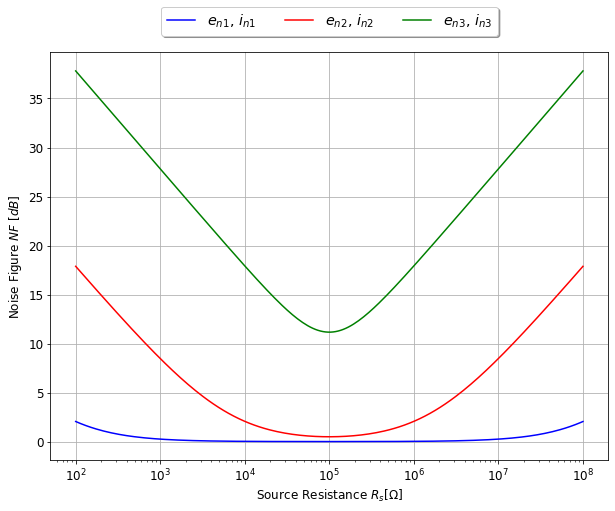

In [125]:
en_vals = [1e-9, 10e-9, 100e-9]
in_vals = [.01e-12, .1e-12, 1e-12]
plot_NF_vs_Rs(en_vals, in_vals, Rs_min = 100, Rs_max = 100e6, T_in_K = 300)

 - For values of $R_S$ below $R_{opt}$, the noise factor is high due to the high value of  $e_n^2/e_{ns}^2$
 
 - As $R_S$ increases beyond $R_{opt}$, the noise factor/figure degrades due to the passage of $i_n$ through $R_S$
 
 - *Question: Why not just increase* $R_S$ *by adding resistance until* $R_S = R_{opt}$?

## Equivalent input noise

 - Noise factor is useful when comparing different amplifiers, but, being a ratio, it does not capture the total noise and as such may be misleading
 
 - The equivalent input voltage noise is due to three sources, $e_n$, $i_n$, and $e_s$, each of which has different contributions to the total noise depending on the source resistance $R_s$
 
 - Again, the equivalent input noise is given by
 
\begin{equation}
e_{ni}^2 = e_s^2 + e_n^2 + i_n^2R_s^2
\end{equation}

 - How does each term contribute to the total noise?

 - For low values of $R_s$, both $e_s$ and $i_n$ contribute minimally to the total noise and $e_n$ dominates
 
 - $e_s$'s contribution to $e_{ni}^2$ depends linearly on $R_s$, while $i_n$'s is quadtratic

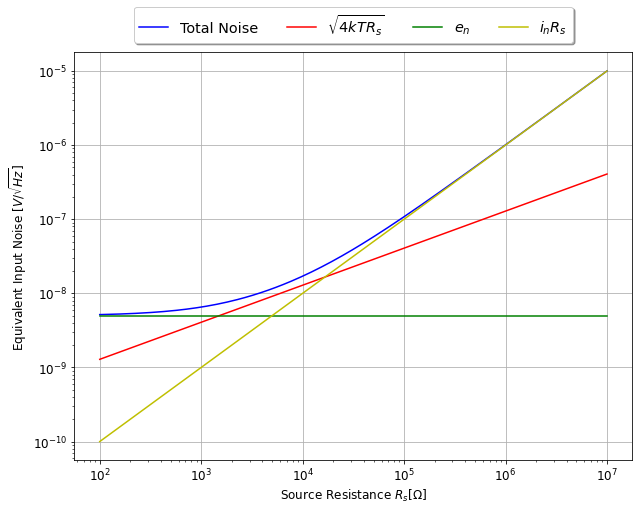

In [126]:
e_n = 5e-9
i_n = 1e-12
plot_noise_curve(e_n, i_n, 100, 10e6)

 - Minimizing $F$ for low values of $R_s$ is a challenge, due to the low value of thermal noise due to the source resistance and the relatively high typical values of $R_e$

## Transformer coupling

<center><img src="img/xformer_coupling.png" width=600 /></center>

 - When dealing with very low source impedances (say, $< 100\Omega$) transformer coupling can be used to realize a better noise factor than achievable by amplifier selection alone
 
 - The transformer allows matching of the source resistance to $R_{opt}$ (to within the precision of the windings ratio)
 
 - The turns ratio $n$ of the transformer is selected to transform $R_s$ to $R_{opt}$
 
\begin{equation}
n^2 = \dfrac{R_{opt}}{R_s} = \dfrac{e_n/i_n}{R_s}
\end{equation}

 - *Caveats*: 1) resistance in the transformer's windings will contribute noise and limit the achievable noise figure, and 2) only useful for AC signals

## Noise in cascaded systems

<center><img src="img/noise_cascaded_system.png" width=800 /></center>

 - The excess noise contribution of a single amplifier can be expressed as

\begin{equation}
N_e = F - 1 = \dfrac{R_e}{R_s}
\end{equation}
 
 - The noise factor of a cascaded system is determined by reflecting the excess noise contribution of each given stage all the way back to the input and dividing by the total power gain between that stage and the input

\begin{equation}
F = 1+F_1 - 1 + \dfrac{F_2-1}{G_1} + \dfrac{F_3-1}{G_1G_2} + \cdots + \dfrac{F_N-1}{\prod_{n=1}^{N-1}G_n}  
\end{equation}

 - From this it is clear that the noise performance of a cascaded system is dominated by the first few stages, and that we should realize as much gain as possible early in the signal path

## Opamp noise model

<center><img src="img/opamp_noise_model.png" width=600 /></center>

 - The opamp noise model comprises two noise currents $i_{na}$ (one at each input) and a single noise voltage $e_{na}$
 
 - $e_{na}$ represents contributions from all devices (transistors and resistors) internal to the opamp, referred to a single input
 
 - $i_{na}$ is associated with the input devices of the differential pair comprising the first stage of the opamp
 
 - Note that the position of the $i_{na}$'s relative to $e_{na}$ doesn't change the model

## Opamp noise versus source resistance

<center><img src="img/AoE_opamp_total_noise_1kHz.png" width=1100 /></center>
 
 - *Figure source: Art of Electronics, Third Edition*

 - The lowest noise is achieved using BJT opamps and low source resistances (voltage noise regime)
 
 - For higher values of $R_S$, BJT current noise dominates, making JFET (and some CMOS) amplifiers more attractive

 - Due to the number of transistors used in opamps, specifically active-load devices, the lowest achievable noise density (which is limited by $e_n$), is typically higher that what is possible with discrete designs
 
 - Nonetheless, due to their simplicity, cost, and size, opamps should be the preferred solution for most applications

## Opamp voltage noise as a function of current

<center><img src="img/AoE_opamp_noise_chart.png" width=800 /></center>

 - Both FET- and BJT-based opamps require high quiescent currents to minimize input voltage noise
  
 - Achieving high performance (i.e. low noise) becomes more difficult as the power budget tightens
 
 - Low-power opamps are, by nature, noisy
 
 - *Figure source: Art of Electronics, Third Edition*

## Opamp noise measurement

<center><img src="img/opamp_en_meas.png" width=500 /></center>

<center><img src="img/opamp_in_meas.png" width=600 /></center>

 - The noise properties of an amplifier can be determined by two measurements: 1) with the input shorted to AC ground for $e_n$, and 2) with an resistor between the input and ground for $i_n$
 
 - To measure $i_n$, the resistance $R_m$ should be selected such that $i_nR_m >> e_n$. In this case, $i_n$ can be calculated as
 
\begin{equation}
i_n = \dfrac{e_{out} - 4kTR_m}{R_m}
\end{equation}
 
 

## Effect of feedback on noise

<center><img src="img/feedback_noise.png" width=700 /></center>

 - The effect that feedback has on noise depends on the location of the noise source in the feedback loop (i.e. where the noise is "injected")
 
 - We can assess the effect of each noise source separately by determining its *noise transfer function* ($NTF$)
 
 - In the case of $e_{ni}$, it is obvious that the noise adds directly to the input, hence the feedback has no affect on this source
 
 - What about $e_{no}$?

 - To determine the effect of $e_{no}$ on the output noise, we'll set $v_{in}$ and $e_{ni}$ to zero to find the $NTF$
 
 - The output in this case is given by
 
\begin{equation}
v_{o,e_{no}} = e_{no} - H(s)\cdot\beta\cdot v_{o,e_{no}}
\end{equation}

 - This can be rearranged as
 
\begin{equation}
v_{o,eno} = \dfrac{e_{no}}{1+H(s)\cdot \beta}
\end{equation} 

 - The noise transfer function is thus
 
\begin{equation}
NTF_{e_{no}} = \dfrac{1}{1+H(s)\cdot \beta}
\end{equation}  

 - We see that the use of feedback reduces noise injected at the *output* of the amplifier by the loop gain. This property is exploited in both phase-locked loops and delta-sigma modulators to minimize certain noise sources (though it has minimal impact on feedback amplifiers)

## Feedback amplifier noise model

<center><img src="img/non_inverting_noise_model.png" width=700 /></center>

 - To utilize to tools/concepts previously developed, such as noise factor and optimum source resistance, the feedback amplifier's noise sources should be converted to equivalent noise sources $e_n$ and $i_n$
 
 - $e_n$ is determined by referring $e_{na}$, $e_{n1}$, $e_{n2}$, and $i_{na}$ at the opamp's inverting terminal to the output and dividing by the *closed-loop* gain
 
 - In this case $i_{n}$ is equal to $i_{na}$ at the non-inverting terminal

<center><img src="img/non_inverting_noise_model.png" width=700 /></center>

<center><img src="img/non_inverting_noise_bandwidth.png" width=800 /></center>


 - The original noise sources $e_{na}$, $i_{na}$, $e_{n1}$, and $e_{n2}$ are due to the opamp's internal noise processes and the thermal noise of the feedback resistances
 
 - The equivalent noise sources are given by
 
\begin{equation}
e_{n}^2 = e_{na}^2 + \dfrac{e_{n2}^2 + (R_2/R_1)^2\cdot e_{n1}^2 + i_{na}^2\cdot R_2^2}{G^2}
\end{equation}

\begin{equation}
i_n^2 = i_{na}^2
\end{equation}

 - $G$ is the closed-loop gain of the non-inverting amplifier

## Amplifier noise gain

 - For both inverting an non-inverting amplifiers, the opamp + feedback resistor noise can be referred to the non-inverting terminal of the opamp as $e_{ni}$
 
 - Assuming $R_s = 0$, the output noise for both inverting and non-inverting configurations is given by
 
\begin{equation}
e_{no}^2 = e_{ni}^2\cdot \left(1+\dfrac{R_2}{R_1}\right)^2
\end{equation}

 - $G = \left(1+\dfrac{R_2}{R_1}\right)$ is referred to as the *noise gain* of the amplifier, which is identical for both structures
 
 - However, the *signal gain* is different for the two configurations ($R_2/R_1$ versus $1+R_2/R_1$), making the inverting amplifier (slightly) worse from a noise perspective

## Amplifier noise bandwidth

<center><img src="img/non_inverting_rms_noise.png" width=600 /></center>

 - The input-referred voltage-noise density is given by
 
\begin{equation}
e_{ni}^2 = e_{ns}^2 + e_{n}^2 + i_{n}^2R_s^2
\end{equation}

 - The bandwidth of the non-inverting amplifier is
 
\begin{equation} 
f_{3dB} = \beta \cdot f_u
\end{equation}

\begin{equation}
\beta = \dfrac{R_1}{R_1+R_2}
\end{equation}


 - We're generally more interested in the integrated or $rms$ noise over a given bandwidth than we are in the noise density alone
 
 - The total integrated noise of the amplifier is equal to the equivalent input voltage noise multiplied by the noise bandwidth 
 
 - Assuming a first-order response, this can be estimated as: $\:\: v_{ni,rms} = \sqrt{e_{ni}^2\cdot f_{3dB}\cdot \dfrac{\pi}{2}} = \sqrt{e_{ni}^2\cdot \beta f_{u}\cdot \dfrac{\pi}{2}}$

 - Since general-purpose opamps have high values of $f_u$ ($1\text{MHz}$ or higher) filtering is typically needed

## Integrated noise

<center><img src="img/AoE_opamp_integrated_noise.png" width=700 /></center>

 - We are generally more interested in the noise integrated over a (typically narrower) bandwidth dictated by the application
 
 - Even for amplifiers that have comparable *spot noise* performance at a given frequency, integrated noise can vary appreciably due to $1/f$ noise
 
 - Thus when comparing different amplifiers it is more instructive/useful to look at the amplifier's noise integrated over the bandwidth of interest
 
 - The variable width of the "flat" region at low frequencies in the plots relates to the varying amounts of $1/f$ noise present at low frequencies
 
 - For CMOS opamps in particular, which have high levels of $1/f$ noise, the flat region extends to relatively high frequencies
 
 - *Figure source: Art of Electronics, Third Edition*

## Opamp 1/f corner frequency

 - $1/f$ noise can have an extremely detrimental effect on performance for low-frequency, low-bandwidth applications
 
 - The $1/f$ performance of an opamp is typically reported in datasheets either as a corner frequency ($f_c$) or peak-to-peak noise over a given frequency range below $f_c$  
 
 - Let's take a look at the noise performance of three imaginary amplifiers with equivalent white noise density but different values of $f_c$

In [155]:
e_nw = 2e-9
fc1 = 100
fc2 = 1e3
fc3 = 10e3
f = np.logspace(0, 6, num=100)
e_n1 = np.sqrt(e_nw**2*(1+fc1/f))
e_n2 = np.sqrt(e_nw**2*(1+fc2/f))
e_n3 = np.sqrt(e_nw**2*(1+fc3/f))
vn1_rms = np.sqrt(integrate.cumtrapz(e_n1**2, f, initial=0)) 
vn2_rms = np.sqrt(integrate.cumtrapz(e_n2**2, f, initial=0)) 
vn3_rms = np.sqrt(integrate.cumtrapz(e_n3**2, f, initial=0) )

 - We see that the noise density curves converage at higher frequencies, but diverge substantially below $f_c$

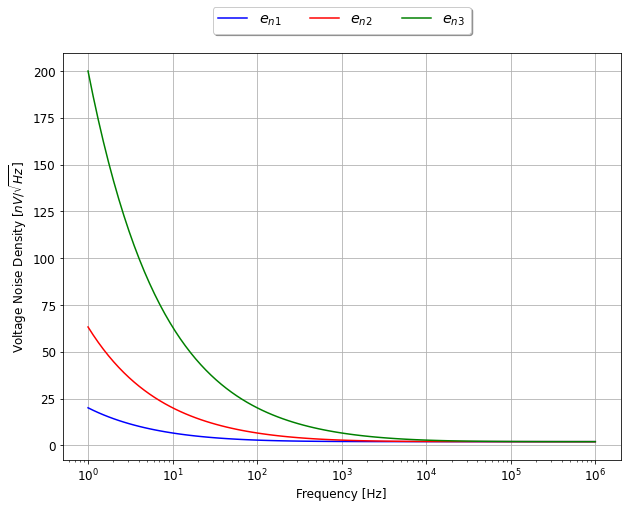

In [156]:
plot_log3xy(f, 1e9*e_n1, 1e9*e_n2, 1e9*e_n3, 'Frequency [Hz]', r'Voltage Noise Density [$nV/\sqrt{Hz}$]',
           r'$e_{n1}$', r'$e_{n2}$', r'$e_{n3}$')

 - The impact of $f_c$ is on integrated noise, with higher values leading to substantially more RMS noise and lower frequencies
 
 - Again, the integrated noise curves converge at frequencies beyond the amplifiers' respective values of $f_c$

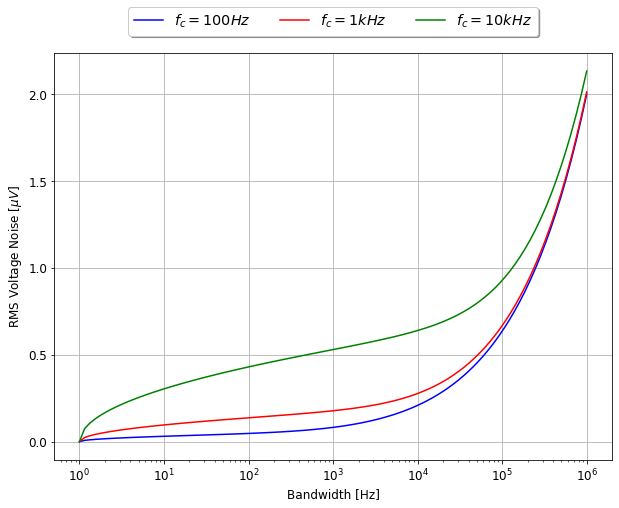

In [158]:
plot_log3xy(f, 1e6*vn1_rms, 1e6*vn2_rms, 1e6*vn3_rms, 'Bandwidth [Hz]', r'RMS Voltage Noise [$\mu V$]',
           r'$f_c = 100Hz$', r'$f_c = 1kHz$', r'$f_c=10kHz$')

## Input capacitance

<center><img src="img/AoE_opamp_input_capacitance.png" width=700 /></center>

 - High input capacitance is gernally a concern for stability and bandwidth, but can also influence noise performance 
 
 - For FETs in particular, realizing low input voltage noise requires large input devices, resulting in high values of input capacitance $C_{in}$
 
 - Opamp input capacitance is a major concern for transimpedance amplifiers and high-impedance sensor applications
 
 - *Figure source: Art of Electronics, Third Edition*

## Example: transimpedance amplifier

<center><img src="img/TIA_Cin.png" width=600 /></center>

 - With the opamp's noise voltage modeled as $e_n$ in series with the non-inverting terminal, feedback forces $e_n$ to appear at the inverting terminal
 
 - The resulting noise current density through $C_{in}$ is $i_{nC} = e_n\cdot 2\pi f C_{in}$
 
 - That is, the amplifier's voltage noise creates a noise current proportional to $C_{in}$ that increases with frequency
 
 - For example, at $1\text{ MHz}$, a noise voltage of $10\text{nV}/\sqrt{\text{Hz}}$ and an input capacitance of $5\text{pF}$ amount to a noise current density of $0.4\text{pA}/\sqrt{\text{Hz}}$

## Choosing a low-noise opamp

 - Focus on opamps that meet the accuracy, speed, power, supply voltage, and swing requirements of the application, and evaluate the noise performance of the amplifiers that meet these requirements
 
 - The total input-referred noise density is given by
 
\begin{equation}
e_{ni}^2 = 4kTR_s + e_n^2 + i_n^2R_s^2 \:\:\:\: V^2/Hz
\end{equation}

 - In general we want low $i_n$ for high signal/sensor impedances, and low $e_n$ for low signal impedances
 
 - Johnson/thermal noise $e_n$ sets a lower bound on the input-referred noise, and $i_n$ can only increase it. Low voltage noise is often irrelevant if source impedance is very high (e.g. $> 1M\Omega$)
 
 - Low thermal/white noise density at a given frequency (e.g. $10kHz$) can be misleading if the $1/f$ corner is high
 
 - Low-noise CMOS/JFET opamps often have large input capacitance, potentially negating the noise benefit for certain applications (e.g. TIA)

## Summary

 - To evaluate the noise of an amplifier/system, its noise should be referred to the input and distilled into two sources, $e_n$ and $i_n$, which are in general partially correlated
 
 - Noise factor/figure is a common measure of *added* amplifier noise, and is the ratio of output noise with the opamp's internal noise and without (i.e. only including source noise)
 
 - Input-referred noise includes $e_n$ and $i_n$, in addition to the noise due to the source, $e_s$, and should be used to evaluate the "raw" noise performance of a given design
 
 - For most applications, integrated (RMS) noise is more relevant than spot noise (though the latter will inform the former)